In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Y = x1B1+x2B2+x3B3.....

In [9]:
#read in data from csv
data = pd.read_csv('houseSmallData.csv')

#cut down total data; training data
train = data.iloc[0:100,:]
data.head()

#goal of this is to use the columns (as many or little as we can) to predict the last column, which is sale price

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
#investigate sale price
salePrice = train['SalePrice']
salePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

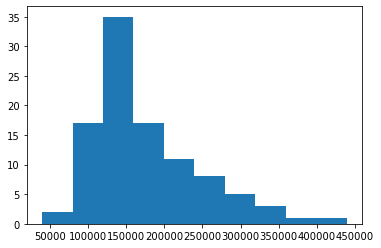

In [11]:
#plot histogram
plt.hist(salePrice)

-0.09632240207755555

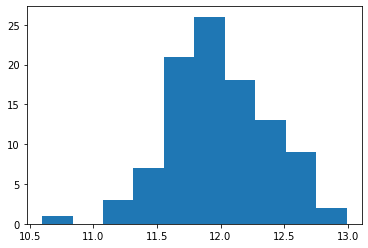

In [12]:
#histogram looks to maybe be log normal distributed so we will try to sacle it
plt.hist(np.log(salePrice))
np.log(salePrice).skew() #skew() returns unbiased skew over the requested axis

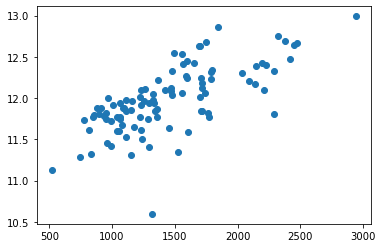

In [13]:
#more transformation
target = np.log(salePrice)
plt.scatter(train['GrLivArea'],y = target)

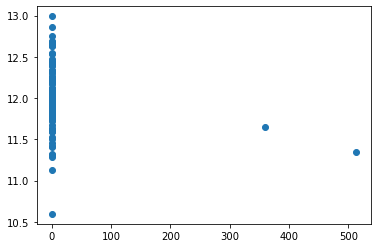

In [14]:
#more transformation
plt.scatter(train['LowQualFinSF'],y = target)

In [15]:
#Looking fo rnulls in each column
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)) #creates a dataframe
nulls[0:20]
nulls1 = train.isnull().sum().sort_values(ascending=False) #creates a series

In [16]:
train.select_dtypes(include=[np.number]).interpolate().dropna(axis = 1)
#sum(data.isnull().sum() !=0)
data.shape

(100, 82)

In [17]:
#select numeric columns, select_dtypes() returns a subset of the dataframe's columns based on the column dtypes
numeric = data.select_dtypes(include=[np.number])
numeric.head()



,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,61,0,0,0,0,NaN,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,0,0,0,0,0,NaN,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,42,0,0,0,0,NaN,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,35,272,0,0,0,NaN,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,84,0,0,0,0,NaN,0,12,2008,250000


In [18]:
#calculate correlation factors and sort to get top 5 highest correlations
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)
cols

SalePrice        1.000000
OverallQual      0.855061
GrLivArea        0.735129
GarageArea       0.688249
GarageCars       0.663441
YearBuilt        0.658636
TotalBsmtSF      0.616297
GarageYrBlt      0.603635
FullBath         0.579505
MasVnrArea       0.571836
TotRmsAbvGrd     0.553603
1stFlrSF         0.550912
YearRemodAdd     0.548330
LotArea          0.497124
Fireplaces       0.487907
WoodDeckSF       0.451241
2ndFlrSF         0.381076
BsmtUnfSF        0.327020
HalfBath         0.319304
LotFrontage      0.302526
OpenPorchSF      0.301960
BsmtFinSF1       0.266713
MoSold           0.256863
BedroomAbvGr     0.233426
BsmtFullBath     0.155689
ScreenPorch      0.035930
3SsnPorch       -0.019391
BsmtHalfBath    -0.055100
MSSubClass      -0.066819
MiscVal         -0.134707
BsmtFinSF2      -0.138126
LowQualFinSF    -0.150027
Id              -0.162735
Unnamed: 0      -0.162735
OverallCond     -0.170443
EnclosedPorch   -0.233483
KitchenAbvGr    -0.235659
YrSold          -0.262683
PoolArea    

In [19]:
# we want to 3 highest correlations and will
# pick out x cols and Y = SalePrice
cols = corr['SalePrice'].sort_values(ascending=False)[0:6].index
X = data[cols]

#assign X and Y 
Y = train['SalePrice']
X = X.drop(['SalePrice'],axis=1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,7,1710,548,2,2003
1,6,1262,460,2,1976
2,7,1786,608,2,2001
3,7,1717,642,3,1915
4,8,2198,836,3,2000
...,...,...,...,...,...
95,6,1470,420,2,1993
96,7,1588,472,2,1999
97,4,960,432,1,1965
98,5,835,366,1,1920


In [20]:
# build Linear Regression Model
from sklearn import linear_model

lr = linear_model.LinearRegression() #instantiates the linear regression model so it can be implemented
model = lr.fit(X,Y) #fits the model according to given data
predictions = model.predict(X) # predict class labels for samples in X


In [21]:
# how good is the model
print(f'R^2 is: {model.score(X,Y)}')  #score() returns the mean accuracy of the model as a percentage

R^2 is: 0.8309859964337736


(array([ 2.,  4., 19., 26., 26., 13.,  6.,  2.,  0.,  2.]),
 array([-72416.69551558, -54597.83016337, -36778.96481115, -18960.09945894,
         -1141.23410673,  16677.63124549,  34496.4965977 ,  52315.36194991,
         70134.22730213,  87953.09265434, 105771.95800655]),
 <BarContainer object of 10 artists>)

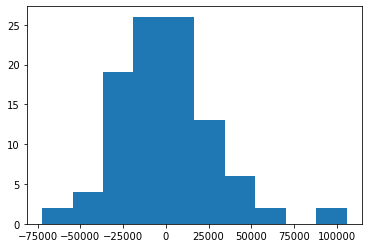

In [22]:
#plotting the error
plt.hist(Y-predictions) #notice how the mean is around 0, this is good

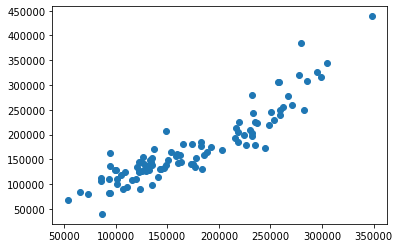

In [23]:
# Scatter plot of predictions
plt.scatter(predictions,Y)


In [24]:

train[['SalePrice', 'OverallQual','MasVnrArea']]

,SalePrice,OverallQual,MasVnrArea
0,208500,7,196.0
1,181500,6,0.0
2,223500,7,162.0
3,140000,7,0.0
4,250000,8,350.0
...,...,...,...
95,185000,6,68.0
96,214000,7,183.0
97,94750,4,48.0
98,83000,5,0.0


In [25]:
#testing data against data we have not seen
test = pd.read_csv('jtest.csv')
test.shape
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [26]:
X = test[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'],axis=1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,6,1610,480,2,1977
1,6,1732,476,2,1985
2,5,1535,410,2,1979
3,7,1226,740,3,2009
4,7,1818,240,1,1931
...,...,...,...,...,...
95,6,1456,440,2,1976
96,7,1726,786,3,2007
97,8,3112,795,2,1918
98,6,2229,0,0,1912


In [27]:
predictions = model.predict(X)
#print(f'R^2 is: {model.score(X,Y)}')
predictions

array([183393.98216915, 193666.03590179, 154906.75785763, 214027.49812444,
       179612.53637261, 271501.56132876,  54850.97512744, 100451.8160819 ,
       109517.71621731, 199175.78567488, 180496.67112575, 204148.64115124,
       285348.87173195, 196946.92780921, 186126.58815538, 186724.04997244,
       125913.64644653, 153616.50987876, 285079.77154792, 186608.6156709 ,
       153855.9560861 ,  90562.81316884, 143982.22403904, 177572.69807683,
       180185.85920091, 104632.74562321, 149370.78641375,  84553.75581081,
       162479.2409444 , 144556.41165272, 223854.73387979, 211525.95148743,
       148728.85788955, 224761.89710024, 159117.86292631, 207234.73606568,
       136857.00059461, 237439.42129587, 252406.00117038, 202014.95436973,
        89533.41110821, 240475.55795036, 154229.53007598, 219846.62935645,
       161101.99173126, 197094.75222607,  89004.3700947 , 235534.39246807,
       182869.3430348 , 118370.88126123, 128216.64320412, 265743.97112593,
       198752.98432859, 1